# Generación de código para desarrollar alineamientos locales y globales
                                 Carolina Cataño Useche 201610075183
                                

## INTRODUCCIÓN

El alineamiento de secuencias es un método que se utiliza para comparar dos o más cadenas, este procedimiento es utilizado en biología con el fin de comparar secuencias biológicas (ácidos nucleicos y proteínas) de forma eficaz, debido a que nos permite hablar acerca de la historia evolutiva de una especie, y a hipotetizar diferentes estructuras y la posible función que estas tendrán, debido a que estructuras similares suelen tener función similar (Anselmo, Guti, and Ram, 2011), en esta medida el alineamiento de secuencias nos permite plantearnos interrogantes como ¿son dos secuencias homólogas?¿tienen una función similar?¿poseen una estructura común?(Gonzáles,1996) .

El alineamiento de secuencias parte de una matriz, construida a partir de las secuencias a comparar estas tienen igual longitud, y consta de tres valores bases al cual se le puede agregar la penalidad dependiendo de la necesidad, el primero se denomina match, utilizado cuando las secuencias son pareadas; el segundo es mis match, el cual es asignado cuando el valor no es pareado y finalmente tenemos el gap que es utilizado para aquellos que no son alineados(Anselmo, Guti, and Ram,2011), a partir de esto podemos reconstruir cuál sería el mejor alineamiento posible.

Existen varios tipos de alineamientos entre ellos el alineamiento global y local que sirven para la comparación de secuencias de tamaños parecidos y la comparación de secuencias de tamaños diferentes, respectivamente (Pinzón,2012).



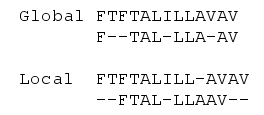

# METODOLOGÍA
Se partió de la base de un código anteriormente generado para alineamientos globales y se adaptó para obtener alineamientos de 
tipo local, finalmente se le dió la posibilidad al usuario de elegir qué clase de alineamiento desea hacer.

para llevar a cabo este procedimiento se necesitan de dos archivos, los cuales se encuentran en la carpeta de este trabajo, 
un documento con la información del código llamado global.py y el archivo con las secuencias llamado ARCHIVO.
a continuación, se observa el código utilizado, sin embargo, este no puede ser ejecutado ya que necesita estar a la par de Archivo.
En la sección de resultado se muestra cómo puede ser llamado los documentos con el fin de obtener respuesta.

la penalización utilizada es
Match= 1
Mismatch= -1
Gap= -2


In [ ]:
import os.path
import sys

class Celda:
    valorIzq = None
    valorArr = None
    valorDiag = None
    valor = None
    rutaArr = False
    rutaIzq = False
    rutaDiag = False
    esNodo = False

class Alineador:        

    def __init__(self):
        self.__GAP = -2
        self.__NOMATCH = -1
        self.__MATCH = +1
        self.__BIFDIAG = 0
        self.__BIFARR = 1
        self.__BIFIZQ = 2
        self.__ZERO = 0
        self.__alineamientos = []
        self.__nombreArchivoSecuencias = None
        self.__Matriz = [[]] 
    ### 
    ### las dos secuencias se leen desde un archivo plano, y deben estar separadas por un salto de línea
    ###
    def __leerSecuenciasDesdeArchivo(self):
        file = open(self.__nombreArchivoSecuencias,'r')
        self.__sequenciaHorizontal = "-"+file.readline().strip()
        self.__sequenciaVertical = "-"+file.readline().strip()

    ###-----
    ### Crea una matriz con tantas columnas como una de las secuencias
    ### y con tantas filas como la otra de las secuencias
    ###
    def __crearMatriz (self):
        self.__totalColumnas = len(self.__sequenciaHorizontal)
        self.__totalFilas = len(self.__sequenciaVertical)
        self.__Matriz = [
                            [None for fil in range(0,self.__totalColumnas)] 
                            for col in range(0,self.__totalFilas)
                        ]
        self.__establecerValorBaseGap()

    ###-----
    ### La intersección gap-gap debe llevar un valor concreto para poder comenzar
    ###   
    def __establecerValorBaseGap(self):
        celda = Celda()
        celda.valor = self.__ZERO
        self.__Matriz[0][0] = celda

    ###----- 
    ### La primera fila de la matriz debe estar cargada con valores a partir de gap
    ###
    def __cargarFilaBase(self):
        gap = self.__Matriz[0][0].valor
        for idxCol in range(1,self.__totalColumnas):
            gap += self.__GAP 
            celda = Celda()
            celda.valor = gap
            self.__Matriz[0][idxCol] = celda

    ###----- 
    ### La primera columna de la matriz debe estar cargada con valores a partir de gap
    ###
    def __cargarColumnaBase(self):
        gap = self.__Matriz[0][0].valor
        for idxFil in range(1,self.__totalFilas):
            gap += self.__GAP 
            celda = Celda()
            celda.valor = gap
            self.__Matriz[idxFil][0] = celda

    ###
    ### Esta función calcula los valores para toda la matriz, basándose en 
    ### la existencia de la función calcular celda. SE debe tener cuidado, 
    ### ya que una celda no puede ser calculada sino cuando tenga calculada la
    ### celda de arriba, la de la izquierda y la de abajo
    def __glocalcularValoresMatriz(self):
        for c in range(1,self.__totalColumnas):
            for f in range(1,self.__totalFilas):
                self.__glocalcularCelda(f, c)
                self.__marcarBifurcacionesCelda(f, c)
                self.__marcarCeldaComoNodoSiEsNodo(f, c)

    ###
    ### Igual que la anterior con excepcion de que en el momento de calcular
    ### el valor de la celda si esta se encuentra con valor negativa se cambia
    ### por un cero
    def __loccalcularValoresMatriz(self):
        for c in range(1,self.__totalColumnas):
            for f in range(1,self.__totalFilas):
                self.__loccalcularCelda(f, c)
                self.__marcarBifurcacionesCelda(f, c)
                self.__marcarCeldaComoNodoSiEsNodo(f, c)
       
    ###
    ### Un elemento de la matriz se calcula con la función mayor.
    ###  función mayor es el mayor entre:
    ###         valor de arriba + gap
    ###         valor de la izquierda + gap
    ###         valor de la diagonal + gap
    ###         cero + gap (sólo para alineamiento local)
    ###    
    def __glocalcularCelda(self, f, c):
        celda = Celda()
        celda.valorIzq = self.__Matriz[f][c-1].valor + self.__GAP
        celda.valorArr = self.__Matriz[f-1][c].valor + self.__GAP

        nuclCol = self.__sequenciaHorizontal[c]
        nuclFil = self.__sequenciaVertical[f]
        match = self.__MATCH if nuclFil == nuclCol else self.__NOMATCH
        celda.valorDiag = self.__Matriz[f-1][c-1].valor + match

        celda.valor = max(celda.valorIzq,celda.valorDiag,celda.valorArr)
        self.__Matriz[f][c] = celda
        return

    ### Realiza las mismas operaciones del metodo anterior con
    ### la diferencia de que si el mayor es un numero negativo
    ### el valor de la celda quedara en 0
    def __loccalcularCelda(self, f, c):
        celda = Celda()
        celda.valorIzq = self.__Matriz[f][c-1].valor + self.__GAP
        if celda.valorIzq < 0: celda.valorIzq = 0
        celda.valorArr = self.__Matriz[f-1][c].valor + self.__GAP
        if celda.valorArr < 0: celda.valorArr = 0
        nuclCol = self.__sequenciaHorizontal[c]
        nuclFil = self.__sequenciaVertical[f]
        match = self.__MATCH if nuclFil == nuclCol else self.__NOMATCH
        celda.valorDiag = self.__Matriz[f-1][c-1].valor + match
        if celda.valorDiag < 0: celda.valorIzq = 0

        celda.valor = max(celda.valorIzq,celda.valorDiag,celda.valorArr)
        self.__Matriz[f][c] = celda
        return

   
    ###
    ### Marca las rutas de conexión entre celdas para saber
    ### desde dónde se seleccionaron los mayores.
    def __marcarBifurcacionesCelda(self, f, c):
        maxVal = self.__Matriz[f][c].valor
        self.__Matriz[f][c].rutaArr  = (maxVal == self.__Matriz[f][c].valorArr )
        self.__Matriz[f][c].rutaIzq  = (maxVal == self.__Matriz[f][c].valorIzq )
        self.__Matriz[f][c].rutaDiag = (maxVal == self.__Matriz[f][c].valorDiag)

    ###
    ### Cuando la función mayor da como resultado más de una via, esto genera
    ### ramas, lo que implica que la celda es un nodo de un grafo o árbol
    ### En este caso la celda se marca como NODO
    def __marcarCeldaComoNodoSiEsNodo (self, f,c):
        self.__Matriz[f][c].esNodo = ( 
            self.__Matriz[f][c].rutaArr and self.__Matriz[f][c].rutaIzq  or
            self.__Matriz[f][c].rutaArr and self.__Matriz[f][c].rutaDiag or
            self.__Matriz[f][c].rutaIzq and self.__Matriz[f][c].rutaDiag 
        )

    def establecerArchivo(self,nombreArchivo):
        if os.path.isfile(nombreArchivo): 
            self.__nombreArchivoSecuencias = nombreArchivo
        else:
            print("Archivo No Existe: ", nombreArchivo)
            raise
        
    def mostrarMatriz(self):
        print('   ',end='')
        for c in range(0,self.__totalColumnas):
            print(" {:>3s} ".format(self.__sequenciaHorizontal[c]), end='')
        for i in range(0,self.__totalFilas):
            print()
            print(' '+self.__sequenciaVertical[i]+' ',end='')
            for j in range(0,self.__totalColumnas):
                print(" {0:>3d} ".format(self.__Matriz[i][j].valor), end='')
        print()
  
    
    ###
    ### presenta en consola los posibles alineamientos calculados
    ###
    def mostrarAlineamientos(self):
        for al in self.__alineamientos:
            print()
            print (al[0])
            print (al[1])


    ###
    ### Se recorre la matriz según algoritmo de alineamiento para generar
    ### las posibles secuencias de alineamiento
    ###
    def alinear(self):
        haymas = True
        while haymas:
            f =  self.__totalFilas-1
            c =  self.__totalColumnas-1
            alineaH = ""
            alineaV = ""
            ultNodo = None
            while c >= 0 and f >= 0:
                celdaBifurca = self.__Matriz[f][c].esNodo
                if self.__Matriz[f][c].rutaDiag:
                     alineaV = self.__sequenciaVertical[f]+alineaV
                     alineaH = self.__sequenciaHorizontal[c]+alineaH
                     if celdaBifurca: ultNodo = [f,c,self.__BIFDIAG]
                     f-= 1
                     c-= 1
                elif self.__Matriz[f][c].rutaIzq:
                     alineaH = self.__sequenciaHorizontal[c]+alineaH
                     alineaV = '-'+alineaV
                     if celdaBifurca: ultNodo = [f,c,self.__BIFIZQ]
                     c-= 1
                elif self.__Matriz[f][c].rutaArr:
                     alineaH = '-'+alineaH
                     alineaV = self.__sequenciaVertical[f]+alineaV
                     if celdaBifurca: ultNodo = [f,c,self.__BIFARR]
                     f-= 1
                else:
                    if f == 0 and c >= 0:
                       alineaH = self.__sequenciaHorizontal[c]+alineaH
                       alineaV = '-'+alineaV
                       c-= 1
                    elif c == 0 and f >= 0:
                         alineaH = '-'+alineaH
                         alineaV = self.__sequenciaVertical[f]+alineaV
                         f-= 1
            self.__alineamientos.append([alineaH,alineaV])
            if ultNodo != None:
                f = ultNodo[0]
                c = ultNodo[1]
                ultBif = ultNodo[2]
                if ultBif == self.__BIFDIAG:
                   self.__Matriz[f][c].rutaDiag = False
                elif ultBif == self.__BIFARR:
                   self.__Matriz[f][c].rutaArr = False
                elif ultBif == self.__BIFIZQ:
                   self.__Matriz[f][c].rutaIzq = False
                self.__marcarCeldaComoNodoSiEsNodo (f,c)
            else:
                haymas = False

    def glopreparar(self):
        self.__leerSecuenciasDesdeArchivo ()
        ### Lee las dos primeras lineas del archivo
        self.__crearMatriz()
        ### Crea la patriz y coloca el GAP(el valor de esquina)
        self.__cargarFilaBase()
        ### Coloca los valores las columnas
        self.__cargarColumnaBase()
        ### Coloca los valores de las filas
        self.__glocalcularValoresMatriz()

    def locpreparar(self):
        self.__leerSecuenciasDesdeArchivo ()
        ### Lee las dos primeras lineas del archivo
        self.__crearMatriz()
        ### Crea la patriz y coloca el GAP(el valor de esquina)
        self.__cargarFilaBase()
        ### Coloca los valores las columnas
        self.__cargarColumnaBase()
        ### Coloca los valores de las filas
        self.__loccalcularValoresMatriz()

        
# --- fin de la clase

### programa de punto de entrada

def alinearglobal(archivo):
    objAlineador = Alineador()
    ### Crea el objeto
    objAlineador.establecerArchivo(archivo)
    ### Indica el nombre del archivo que se ve a utilizar
    objAlineador.glopreparar()
    ### Llena los valores de la matriz y busca los caminos que debe tomar
    objAlineador.mostrarMatriz()
    ### Imprime la matriz siguiendo un formato
    objAlineador.alinear()
    objAlineador.mostrarAlineamientos()


def alinearlocal(archivo):
    objAlineador = Alineador()
    ### Crea el objeto
    objAlineador.establecerArchivo(archivo)
    ### Indica el nombre del archivo que se ve a utilizar
    objAlineador.locpreparar()
    ### Llena los valores de la matriz y busca los caminos que debe tomar
    objAlineador.mostrarMatriz()
    ### Imprime la matriz siguiendo un formato
    objAlineador.alinear()
    objAlineador.mostrarAlineamientos()

def main():
    if len(sys.argv) == 1:
       print ("Falta el nombre del archivo de secuencias")
       return

    nombreArchivo = sys.argv[1]
    if not os.path.isfile(nombreArchivo): 
       print("Archivo No Existe: ", nombreArchivo)
       return

    condi = input("El alineamiento que deseas hacer es global o local? (g/l)")
    if condi=="g":
        alinearglobal(nombreArchivo)
    elif condi == "l":
        alinearlocal(nombreArchivo)
    else:
        print("Seleccione una opcion valida")


if __name__ == "__main__":
   main()


# RESULTADOS
para ejecutar el código debemos llamar al archivo en que se encuentra el código en conjuto el archivo con las secuencias

In [ ]:
%run global.py

In [ ]:
%run global.py ARCHIVO

A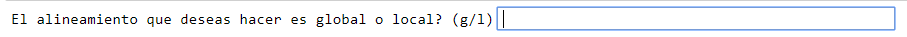

Al Ejecutar la funcióna anterior te va a pedir que ingreses que tipo de alineamiento es el que deseas hacer

In [ ]:
Alineamiento global (g) acá podemos observar los resultados para un alineamiento global 

In [2]:
%run global.py ARCHIVO

El alineamiento que deseas hacer es global o local? (g/l)g
      -    A    G    T    C    G    G    T    A    A    T    A    T    A    A    T 
 -    0   -2   -4   -6   -8  -10  -12  -14  -16  -18  -20  -22  -24  -26  -28  -30 
 A   -2    1   -1   -3   -5   -7   -9  -11  -13  -15  -17  -19  -21  -23  -25  -27 
 G   -4   -1    2    0   -2   -4   -6   -8  -10  -12  -14  -16  -18  -20  -22  -24 
 T   -6   -3    0    3    1   -1   -3   -5   -7   -9  -11  -13  -15  -17  -19  -21 
 C   -8   -5   -2    1    4    2    0   -2   -4   -6   -8  -10  -12  -14  -16  -18 
 C  -10   -7   -4   -1    2    3    1   -1   -3   -5   -7   -9  -11  -13  -15  -17 
 C  -12   -9   -6   -3    0    1    2    0   -2   -4   -6   -8  -10  -12  -14  -16 
 A  -14  -11   -8   -5   -2   -1    0    1    1   -1   -3   -5   -7   -9  -11  -13 
 T  -16  -13  -10   -7   -4   -3   -2    1    0    0    0   -2   -4   -6   -8  -10 
 A  -18  -15  -12   -9   -6   -5   -4   -1    2    1   -1    1   -1   -3   -5   -7 
 T  -20  -17  -14

In [ ]:
Alineamiento local (l) acá observamo el alineamiento local para la secuencia que ingresamos

In [3]:
%run global.py ARCHIVO

El alineamiento que deseas hacer es global o local? (g/l)l
      -    A    G    T    C    G    G    T    A    A    T    A    T    A    A    T 
 -    0   -2   -4   -6   -8  -10  -12  -14  -16  -18  -20  -22  -24  -26  -28  -30 
 A   -2    1    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 G   -4    0    2    0    0    1    1    0    0    0    0    0    0    0    0    0 
 T   -6    0    0    3    0    0    0    2    0    0    1    0    1    0    0    1 
 C   -8    0    0    1    4    0    0    0    1    0    0    0    0    0    0    0 
 C  -10    0    0    0    2    3    0    0    0    0    0    0    0    0    0    0 
 C  -12    0    0    0    1    1    2    0    0    0    0    0    0    0    0    0 
 A  -14    0    0    0    0    0    0    1    1    1    0    1    0    1    1    0 
 T  -16    0    0    1    0    0    0    1    0    0    2    0    2    0    0    2 
 A  -18    0    0    0    0    0    0    0    2    1    0    3    0    3    1    0 
 T  -20    0    0

# ANALISIS

tal como podemos observar en los resultados dos secuencias iguales arrojaran resultados diferentes de acuerdo al alineamiento utilizado, ya sea global o local.
al comparar las dos matrices generadas se puede observar que los valores negativos en la matriz del alineamiento local se convierten en 0, además, al reconstruir los alineamientos más probables se ven una mayor cantidad en comparación al alineamiento global que solo presenta dos.





# CONCLUSIONES
los alineamientos de secuencias son una herramienta útil en la medida que nos permiten hacer comparaciones y así poder sacar hipótesis acerca de relaciones filogenéticas o funcionalidad de cadenas.

# BIBLIOGRAFÍA

1. Anselmo, Roman, Mora Guti, and Javier Ram. “Istica Para Solucionar El Problema ´ Ltiple De Secuencias De Alineamiento M U Heuristic for Solving the Multiple Alignment Sequence Problem.” 18.1 (2011): 121–136. Print.

2. Gonzáles, Dolores. “Codificación de Las Inserciones-Deleciones En El Análisis Filogenético de Secuencias Génicas.” 1996: n. pag. Print.

3. Pinzón, Andrés. “Alineamiento: Análisis Computacional de Secuencias.” Universidad Nacional de Colombia (2012): n. pag. Web.

4. Shum, HY. & Szeliski, R. International Journal of Computer Vision (2000) 36: 101. https://doi.org/10.1023/A:1008195814169
